# Проект: Обучение с учителем: качество модели

# Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# Как решать задачу
Продумывать подход к решению этой задачи вам не придётся — руководитель отдела его уже сформировал:

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
    * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    * Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    * Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    * Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
    
Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.
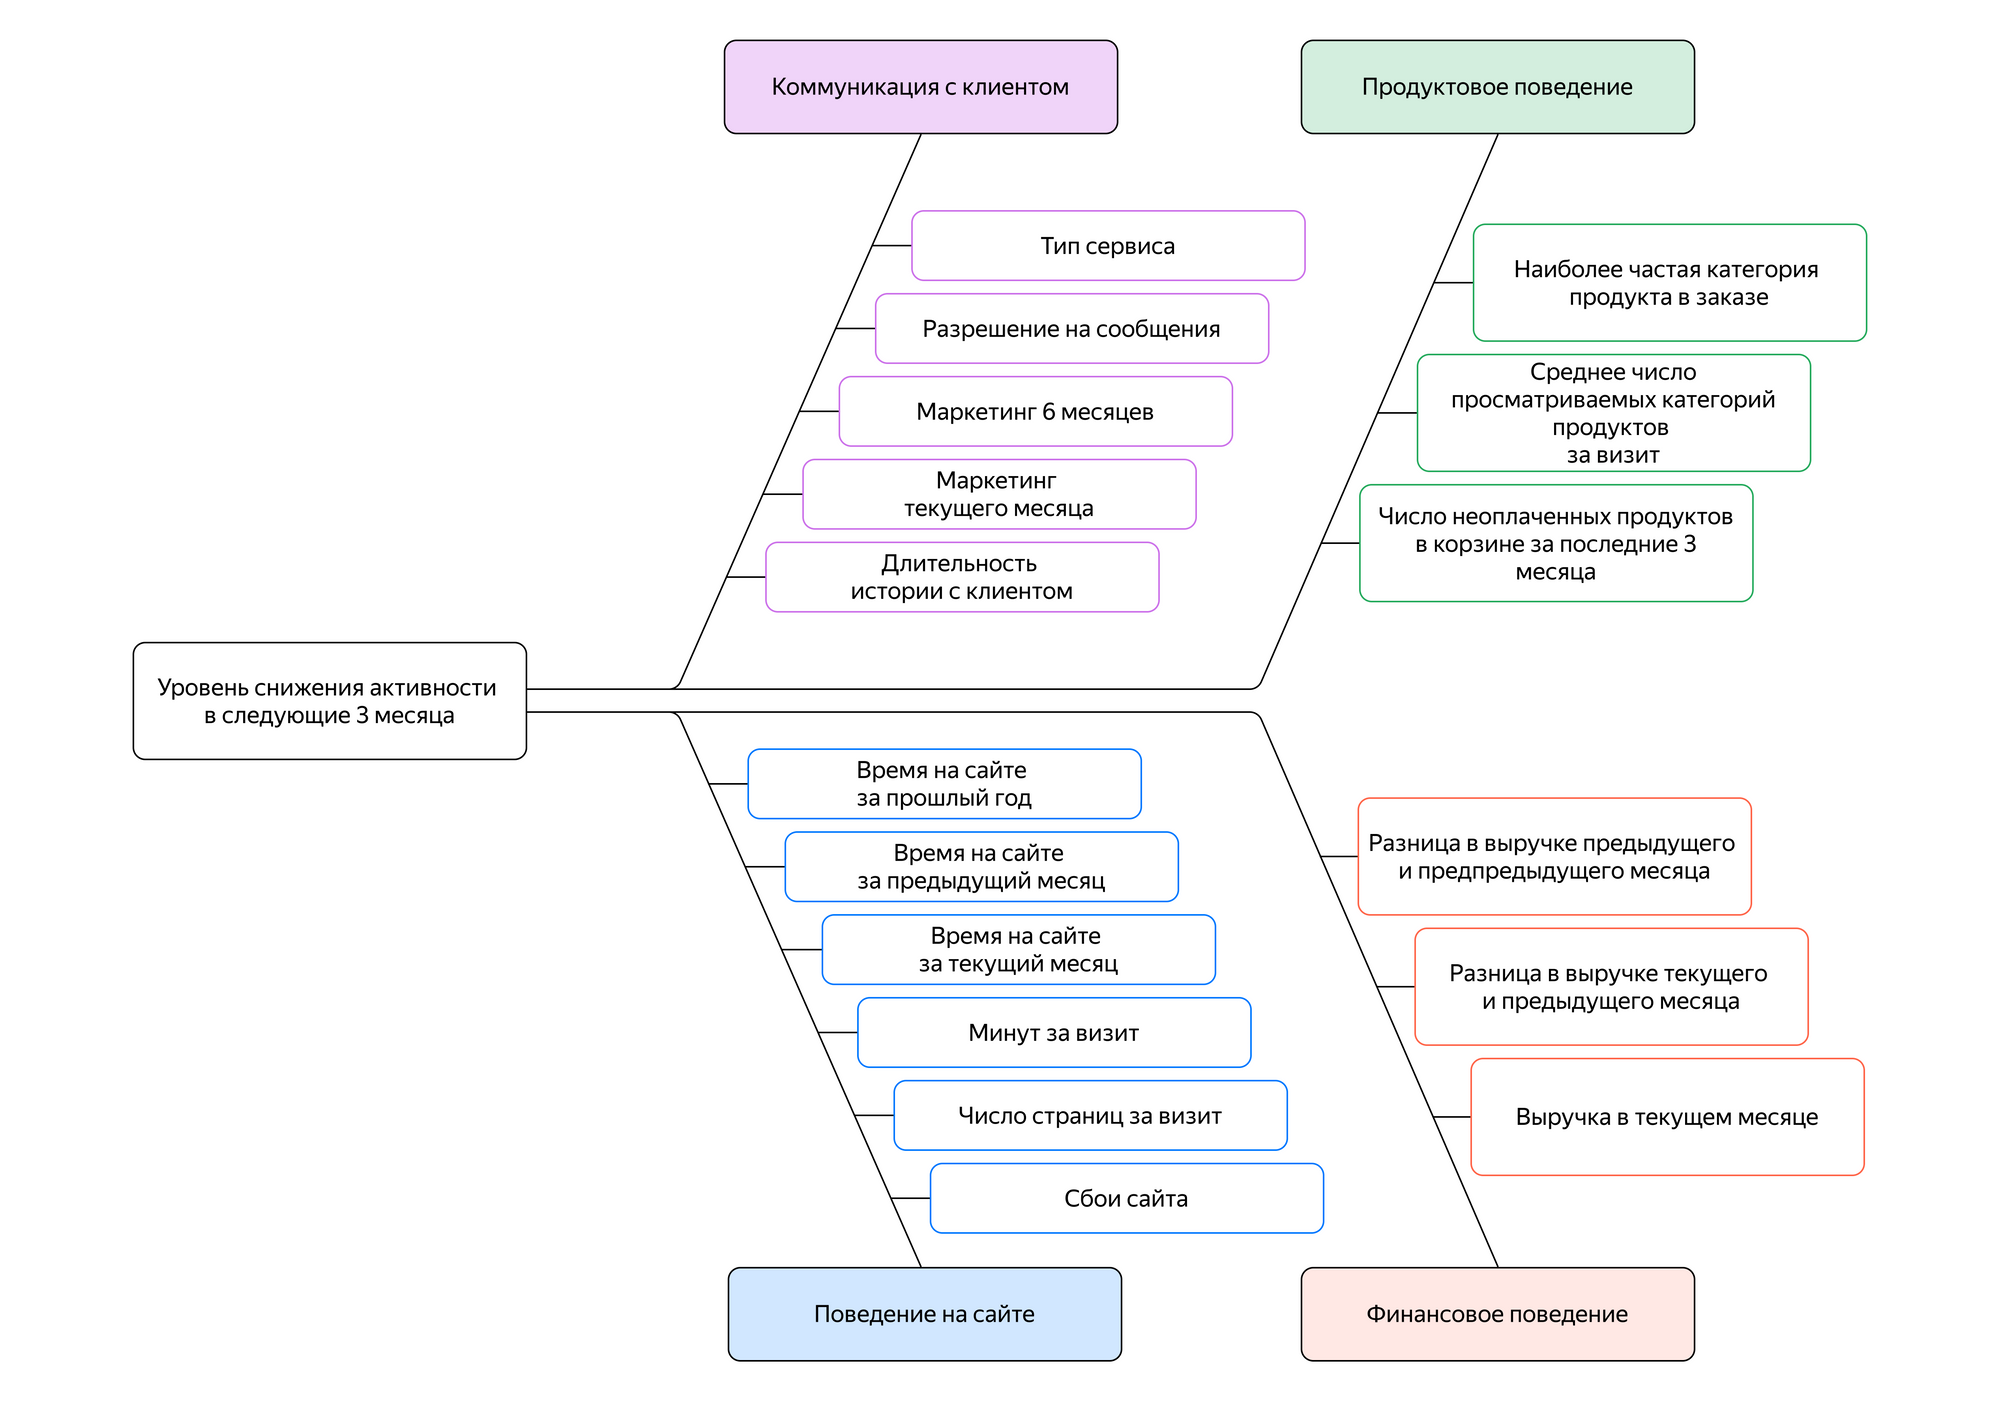

1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Руководство одобрило описание решения, и вам, как специалисту по DS, нужно его реализовать.

# Описание данных

**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

|Название столбцов|Описание|
|-|--------|
|id|номер покупателя в корпоративной базе данных.|
|Покупательская активность|рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».|
|Тип сервиса|уровень сервиса, например «премиум» и «стандарт».|
|Разрешить сообщать|информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.|
|Маркет_актив_6_мес|среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.|
|Маркет_актив_тек_мес|количество маркетинговых коммуникаций в текущем месяце.|
|Длительность|значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.|
|Акционные_покупки|среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.|
|Популярная_категория|самая популярная категория товаров у покупателя за последние 6 месяцев.|
|Средний_просмотр_категорий_за_визит|показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.|
|Неоплаченные_продукты_штук_квартал|общее число неоплаченных товаров в корзине за последние 3 месяца.|
|Ошибка_сервиса|число сбоев, которые коснулись покупателя во время посещения сайта.|
|Страниц_за_визит|среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.|

**market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

|Название столбцов|Описание|
|-|--------|
|id|номер покупателя в корпоративной базе данных.|
|Период|название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.|
|Выручка|сумма выручки за период.|

**market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

|Название столбцов|Описание|
|-|--------|
|id|номер покупателя в корпоративной базе данных.|
|Период|название периода, во время которого зафиксировано общее время.|
|минут|значение времени, проведённого на сайте, в минутах.|

**money.csv**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

|Название столбцов|Описание|
|-|--------|
|id|номер покупателя в корпоративной базе данных.|
|Прибыль|значение прибыли|

# Инструкция по выполнению проекта

**Решать задачу вам нужно в два этапа:**

**1. Разработайте модель, которая предскажет вероятность снижения покупательской активности.**

**2. Выделите сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность. Используйте данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию вы можете проанализировать больше одного сегмента.**

Ниже несколько примеров сегментов, но вы также можете выделить свой:

* Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
* Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
* Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
* Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

# Шаг 1. Загрузка данных
 
 **1.1 Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:**

/datasets/market_file.csv

/datasets/market_money.csv

/datasets/market_time.csv

/datasets/money.csv

 Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.  

 **1.2 Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.**

# Шаг 2. Предобработка данных

**Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.**

# Шаг 3. Исследовательский анализ данных

**Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.**

# Шаг 4. Объединение таблиц

**4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся.** 

**4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.**

# Шаг 5. Корреляционный анализ

**Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.**

# Шаг 6. Использование пайплайнов

**Примените все изученные модели. Для этого используйте пайплайны.**

**6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.**

**Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.**

**6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.**

**6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:**

* использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
* использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

# Шаг 7. Анализ важности признаков

**7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP.** 

**7.2 Сделайте выводы о значимости признаков:**
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

# Шаг 8. Сегментация покупателей

**8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.**

**8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность:** 
* Проведите графическое и аналитическое исследование группы покупателей.
* Сделайте предложения по работе с сегментом для увеличения покупательской активности.

**8.3 Сделайте выводы о сегментах:**
* какой сегмент вы взяли для дополнительного исследования,
* какие предложения вы сделали и почему.

## Шаг 1. Загрузка данных

In [1]:
!pip install shap 

     |████████████████████████████████| 539 kB 1.3 MB/s eta 0:00:01


In [2]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 13.4 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 112.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [5]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=";", decimal=",")

**market_file**

In [6]:
market_file.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [7]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

**market_money**

In [8]:
market_money.head()

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [9]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


**market_time**

In [10]:
market_time.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [11]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


**money**

In [12]:
money.head()

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [13]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Вывод:** Загруженные данные соотвествуют описанию и отсустуют пропуски

## Шаг 2. Предобработка данных

In [14]:
market_file.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in market_file.columns]

In [15]:
market_file = market_file.rename(columns={
    'покупательская активность': 'покупательская_активность',
    'тип сервиса': 'тип_сервиса',
    'разрешить сообщать': 'разрешить_сообщать'
})

In [16]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [17]:
market_money.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in market_money.columns]

In [18]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [19]:
market_time.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in market_time.columns]

In [20]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [21]:
money.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in money.columns]

In [22]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [23]:
market_file.isnull().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [24]:
market_file

id покупательская_активность тип_сервиса разрешить_сообщать  \
0     215348                 Снизилась     премиум                 да   
1     215349                 Снизилась     премиум                 да   
2     215350                 Снизилась   стандартт                нет   
3     215351                 Снизилась   стандартт                 да   
4     215352                 Снизилась   стандартт                нет   
...      ...                       ...         ...                ...   
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
0                    3.4                     5           121   
1                    4.4                     4           819   
2                    4.9                     3           539   
3                    3.2                     5           896   
4                    5.1                     3          1064   
...                  ...                   ...           ...   
1295                 6.6                     3           318   
1296                 5.1                     4           454   
1297                 4.1                     3           586   
1298                 6.3                     5           645   
1299                 4.0                     5           906   

      акционные_покупки            популярная_категория  \
0                  0.00                Товары для детей   
1                  0.75                Товары для детей   
2                  0.14               Домашний текстиль   
3                  0.99                Товары для детей   
4                  0.94                Товары для детей   
...                 ...                             ...   
1295               0.24  Техника для красоты и здоровья   
1296               0.21               Домашний текстиль   
1297               0.20               Домашний текстиль   
1298               0.12  Техника для красоты и здоровья   
1299               0.94  Техника для красоты и здоровья   

      средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
0                                       6                                   2   
1                                       4                                   4   
2                                       5                                   2   
3                                       5                                   0   
4                                       3                                   2   
...                                   ...                                 ...   
1295                                    5                                   3   
1296                                    6                                   2   
1297                                    3                                   2   
1298                                    3                                   3   
1299                                    4                                   5   

      ошибка_сервиса  страниц_за_визит  
0                  1                 5  
1                  2                 5  
2                  1                 5  
3                  6                 4  
4                  3                 2  
...              ...               ...  
1295               3                11  
1296               3                 9  
1297               5                 7  
1298               5                 7  
1299               3                12  

[1300 rows x 13 columns]

In [25]:
market_money.isnull().sum()

id         0
период     0
выручка    0
dtype: int64

In [26]:
market_time.isnull().sum()

id        0
период    0
минут     0
dtype: int64

In [27]:
money.isnull().sum()

id         0
прибыль    0
dtype: int64

**Дубликаты**

In [28]:
print('Количество дублирующихся строк market_file:',market_file.duplicated().sum())

Количество дублирующихся строк market_file: 0


In [29]:
print('Количество дублирующихся строк market_money:',market_money.duplicated().sum())

Количество дублирующихся строк market_money: 0


In [30]:
print('Количество дублирующихся строк market_time:',market_time.duplicated().sum())

Количество дублирующихся строк market_time: 0


In [31]:
print('Количество дублирующихся строк money:',money.duplicated().sum())

Количество дублирующихся строк money: 0


**Типы данных**

*market_file*

In [32]:
market_file.dtypes

id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object

In [33]:
market_file.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

*market_money*

In [34]:
market_money.dtypes

id           int64
период      object
выручка    float64
dtype: object

In [35]:
market_money.head()

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

*market_time*

In [36]:
market_time.dtypes

id         int64
период    object
минут      int64
dtype: object

In [37]:
market_time.head()

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

*money*

In [38]:
money.dtypes

id           int64
прибыль    float64
dtype: object

In [39]:
money.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

*market_file*

In [40]:
print(f'Уникальные значения признака "покупательская_активность": {market_file["покупательская_активность"].unique()}')


Уникальные значения признака "покупательская_активность": ['Снизилась' 'Прежний уровень']


In [41]:
print(f'Уникальные значения признака "тип_сервиса": {market_file["тип_сервиса"].unique()}')

Уникальные значения признака "тип_сервиса": ['премиум' 'стандартт' 'стандарт']


In [42]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

In [43]:
print(f'Уникальные значения признака "тип_сервиса": {market_file["тип_сервиса"].unique()}')

Уникальные значения признака "тип_сервиса": ['премиум' 'стандарт']


In [44]:
print(f'Уникальные значения признака "разрешить_сообщать": {market_file["разрешить_сообщать"].unique()}')

Уникальные значения признака "разрешить_сообщать": ['да' 'нет']


In [45]:
print(f'Уникальные значения признака "популярная_категория": {market_file["популярная_категория"].unique()}')

Уникальные значения признака "популярная_категория": ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [46]:
market_file['популярная_категория'] = market_file['популярная_категория'].replace('Косметика и аксесуары', 'Косметика и аксесcуары')

In [47]:
print(f'Уникальные значения признака "популярная_категория": {market_file["популярная_категория"].unique()}')

Уникальные значения признака "популярная_категория": ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесcуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


*market_money*

In [48]:
print(f'Уникальные значения признака "период": {market_money["период"].unique()}')

Уникальные значения признака "период": ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


*market_time*

In [49]:
print(f'Уникальные значения признака "период": {market_time["период"].unique()}')

Уникальные значения признака "период": ['текущий_месяц' 'предыдцщий_месяц']


In [50]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [51]:
print(f'Уникальные значения признака "период": {market_time["период"].unique()}')

Уникальные значения признака "период": ['текущий_месяц' 'предыдущий_месяц']


**Вывод:** В ходе обработки данных, было выяснено:

- Все данные соответсвую действительности
- Типы данных подходят по смыслу
- Были исправленны опечатки
- Также были переименованы столбцы для удобства

В результате будет проще работать с данными в дальнейшем

## Шаг 3. Исследовательский анализ данных

*market_file*

In [52]:
market_file.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

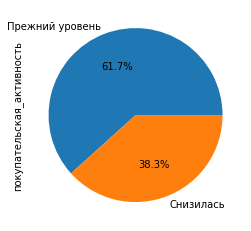

In [53]:
market_file_pie_1=market_file['покупательская_активность'].value_counts()
market_file_pie_1.plot(kind='pie',autopct='%1.1f%%')
plt.show()

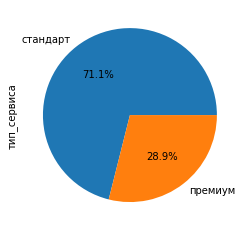

In [54]:
market_file_pie_2=market_file['тип_сервиса'].value_counts()
market_file_pie_2.plot(kind='pie',autopct='%1.1f%%')
plt.show()

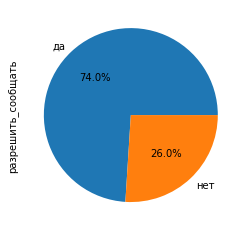

In [55]:
market_file_pie_3=market_file['разрешить_сообщать'].value_counts()
market_file_pie_3.plot(kind='pie',autopct='%1.1f%%')
plt.show()

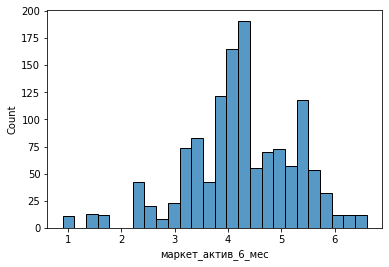

In [56]:
sns.histplot(market_file['маркет_актив_6_мес'])
plt.show()

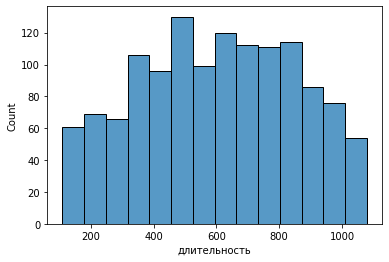

In [57]:
sns.histplot(market_file['длительность'])
plt.show()

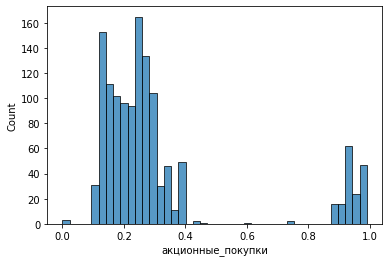

In [58]:
sns.histplot(market_file['акционные_покупки'])
plt.show()

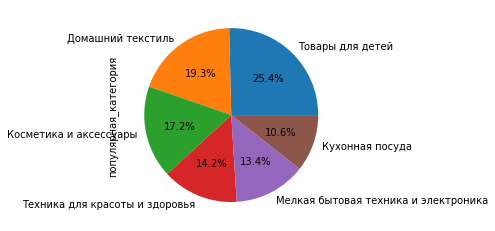

In [59]:
market_file_pie_4=market_file['популярная_категория'].value_counts()
market_file_pie_4.plot(kind='pie',autopct='%1.1f%%')
plt.show()

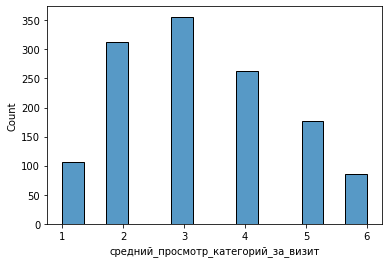

In [60]:
sns.histplot(market_file['средний_просмотр_категорий_за_визит'])
plt.show()

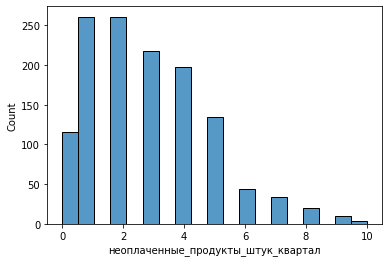

In [61]:
sns.histplot(market_file['неоплаченные_продукты_штук_квартал'])
plt.show()

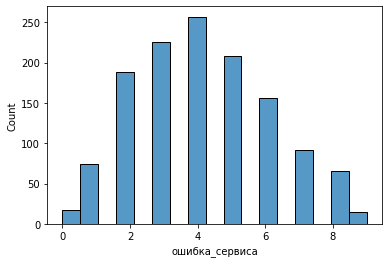

In [62]:
sns.histplot(market_file['ошибка_сервиса'])
plt.show()

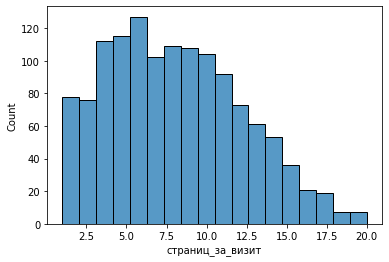

In [63]:
sns.histplot(market_file['страниц_за_визит'])
plt.show()

*market_money*

In [64]:
market_money.head()

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

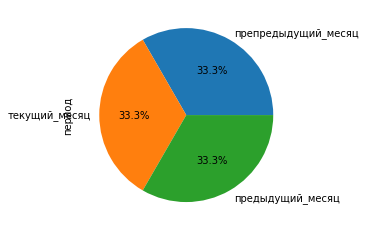

In [65]:
market_money_pie=market_money['период'].value_counts()
market_money_pie.plot(kind='pie',autopct='%1.1f%%')
plt.show()

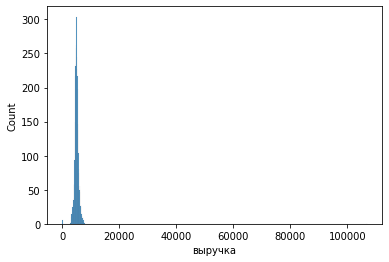

In [66]:
sns.histplot(market_money['выручка'])
plt.show()

In [67]:
market_money[market_money['выручка'] > 8000]

id         период   выручка
98  215380  текущий_месяц  106862.2

In [68]:
market_money = market_money[market_money['выручка'] != 106862.2]

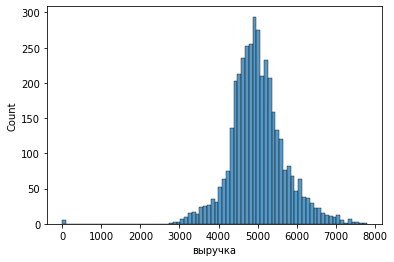

In [69]:
sns.histplot(market_money['выручка'])
plt.show()

In [70]:
market_money = market_money[market_money['выручка'] != 0]

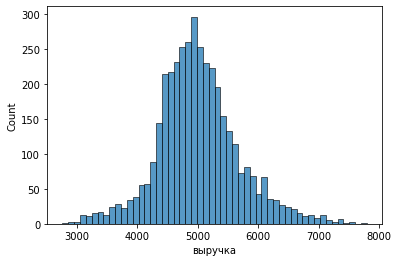

In [71]:
sns.histplot(market_money['выручка'])
plt.show()

*market_time*

In [72]:
market_time.head()

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдущий_месяц     12
4  215350     текущий_месяц     13

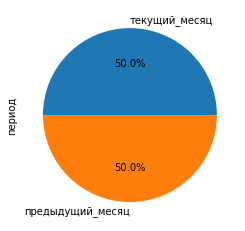

In [73]:
market_time_pie=market_time['период'].value_counts()
market_time_pie.plot(kind='pie',autopct='%1.1f%%')
plt.show()

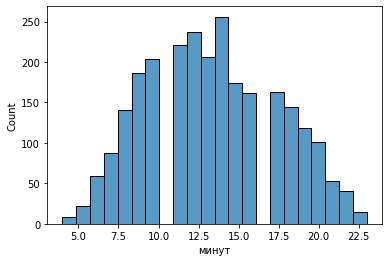

In [74]:
sns.histplot(market_time['минут'])
plt.show()

*money*

In [75]:
money.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

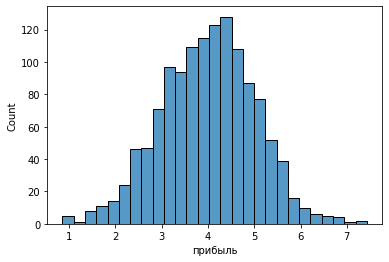

In [76]:
sns.histplot(money['прибыль'])
plt.show()

**Вывод:**
- Были показанны зависимости между колличественнными и числом записей в таблицах
- Были показаны соотношения категориальных значений
- Были убраны аномальные значения
- Большинство графиков напоминает нормальное распределенние

## Шаг 4. Объединение таблиц

In [77]:
market_money

id               период  выручка
1     215348        текущий_месяц   3293.1
3     215349  препредыдущий_месяц   4472.0
4     215349        текущий_месяц   4971.6
5     215349     предыдущий_месяц   5216.0
6     215350  препредыдущий_месяц   4826.0
...      ...                  ...      ...
3895  216646  препредыдущий_месяц   4725.0
3896  216646     предыдущий_месяц   4923.0
3897  216647     предыдущий_месяц   4720.0
3898  216647  препредыдущий_месяц   5183.0
3899  216647        текущий_месяц   4448.3

[3893 rows x 3 columns]

In [78]:
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [79]:
market_money = market_money.rename(columns={'период': 'период_деньги'})
market_money.columns

Index(['id', 'период_деньги', 'выручка'], dtype='object')

In [80]:
market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [81]:
market_time

id            период  минут
0     215348     текущий_месяц     14
1     215348  предыдущий_месяц     13
2     215349     текущий_месяц     10
3     215349  предыдущий_месяц     12
4     215350     текущий_месяц     13
...      ...               ...    ...
2595  216645     текущий_месяц     18
2596  216646  предыдущий_месяц     18
2597  216646     текущий_месяц      7
2598  216647     текущий_месяц     10
2599  216647  предыдущий_месяц     15

[2600 rows x 3 columns]

In [82]:
market_time = market_time.rename(columns={'период': 'период_время'})
market_time.columns

Index(['id', 'период_время', 'минут'], dtype='object')

In [83]:
m_data_time = market_time.pivot(index='id', columns='период_время', values='минут').reset_index()

In [84]:
m_data_time

период_время      id  предыдущий_месяц  текущий_месяц
0             215348                13             14
1             215349                12             10
2             215350                 8             13
3             215351                11             13
4             215352                 8             11
...              ...               ...            ...
1295          216643                14              7
1296          216644                12             11
1297          216645                12             18
1298          216646                18              7
1299          216647                15             10

[1300 rows x 3 columns]

In [85]:
m_data_time = m_data_time.rename(columns={'предыдущий_месяц': 'предыдущий_месяц_время',
                                         'текущий_месяц':'текущий_месяц_время'})
m_data_time.columns

Index(['id', 'предыдущий_месяц_время', 'текущий_месяц_время'], dtype='object', name='период_время')

In [86]:
m_market_money = market_money.pivot(index='id', columns='период_деньги', values='выручка').reset_index()

In [87]:
m_market_money

период_деньги      id  предыдущий_месяц  препредыдущий_месяц  текущий_месяц
0              215348               NaN                  NaN         3293.1
1              215349            5216.0               4472.0         4971.6
2              215350            5457.5               4826.0         5058.4
3              215351            6158.0               4793.0         6610.4
4              215352            5807.5               4594.0         5872.5
...               ...               ...                  ...            ...
1295           216643            3664.0               4704.0         4741.7
1296           216644            4729.0               5299.0         5353.0
1297           216645            5160.0               5334.0         5139.2
1298           216646            4923.0               4725.0         5224.6
1299           216647            4720.0               5183.0         4448.3

[1300 rows x 4 columns]

In [88]:
m_market_money = m_market_money.rename(columns={'предыдущий_месяц': 'предыдущий_месяц_деньги',
                                               'препредыдущий_месяц':'препредыдущий_месяц_деньги',
                                               'текущий_месяц':'текущий_месяц_деньги'})
m_market_money.columns

Index(['id', 'предыдущий_месяц_деньги', 'препредыдущий_месяц_деньги',
       'текущий_месяц_деньги'],
      dtype='object', name='период_деньги')

In [89]:
result = market_file.merge(m_data_time, on='id', how='left')

In [90]:
if not m_market_money.empty:
    result = result.merge(m_market_money, on='id', how='left')

In [91]:
result

id покупательская_активность тип_сервиса разрешить_сообщать  \
0     215348                 Снизилась     премиум                 да   
1     215349                 Снизилась     премиум                 да   
2     215350                 Снизилась    стандарт                нет   
3     215351                 Снизилась    стандарт                 да   
4     215352                 Снизилась    стандарт                нет   
...      ...                       ...         ...                ...   
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
0                    3.4                     5           121   
1                    4.4                     4           819   
2                    4.9                     3           539   
3                    3.2                     5           896   
4                    5.1                     3          1064   
...                  ...                   ...           ...   
1295                 6.6                     3           318   
1296                 5.1                     4           454   
1297                 4.1                     3           586   
1298                 6.3                     5           645   
1299                 4.0                     5           906   

      акционные_покупки            популярная_категория  \
0                  0.00                Товары для детей   
1                  0.75                Товары для детей   
2                  0.14               Домашний текстиль   
3                  0.99                Товары для детей   
4                  0.94                Товары для детей   
...                 ...                             ...   
1295               0.24  Техника для красоты и здоровья   
1296               0.21               Домашний текстиль   
1297               0.20               Домашний текстиль   
1298               0.12  Техника для красоты и здоровья   
1299               0.94  Техника для красоты и здоровья   

      средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
0                                       6                                   2   
1                                       4                                   4   
2                                       5                                   2   
3                                       5                                   0   
4                                       3                                   2   
...                                   ...                                 ...   
1295                                    5                                   3   
1296                                    6                                   2   
1297                                    3                                   2   
1298                                    3                                   3   
1299                                    4                                   5   

      ошибка_сервиса  страниц_за_визит  предыдущий_месяц_время  \
0                  1                 5                      13   
1                  2                 5                      12   
2                  1                 5                       8   
3                  6                 4                      11   
4                  3                 2                       8   
...              ...               ...                     ...   
1295               3                11                      14   
1296               3                 9                      12   
1297               5                 7                      12   
1298               5  

In [92]:
activity_columns = ['предыдущий_месяц_деньги', 'препредыдущий_месяц_деньги', 'текущий_месяц_деньги']

In [93]:
result=result.dropna(subset=activity_columns)  # Убираем строки с NaN

In [94]:
result.shape

(1296, 18)

In [95]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

**Вывод:** 

В ходе объединения таблиц:
- были удалены значение, которые нужно было убрать по ТЗ
- Для того, чтобы не путаться между столбцами market_money и market_time некоторые стобцы были переименованы чтобы понимать их принадлежность и что это за значения

## Шаг 5. Корреляционный анализ

In [96]:
merged_data_cor=result.drop(['id'],axis=1)

In [97]:
VIFs = pd.DataFrame()

In [98]:
X = merged_data_cor.select_dtypes(include=['float64', 'int64']).dropna()  # Только числовые и без NaN

In [99]:
VIFs['Variable'] = X.columns

In [100]:
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [101]:
VIFs

Variable         VIF
0                    маркет_актив_6_мес   22.677624
1                  маркет_актив_тек_мес   31.202021
2                          длительность    7.089501
3                     акционные_покупки    3.020589
4   средний_просмотр_категорий_за_визит    7.843026
5    неоплаченные_продукты_штук_квартал    3.378888
6                        ошибка_сервиса    6.043898
7                      страниц_за_визит    7.354271
8                предыдущий_месяц_время   19.386816
9                   текущий_месяц_время   14.262925
10              предыдущий_месяц_деньги  210.288621
11           препредыдущий_месяц_деньги  148.278718
12                 текущий_месяц_деньги  146.463486

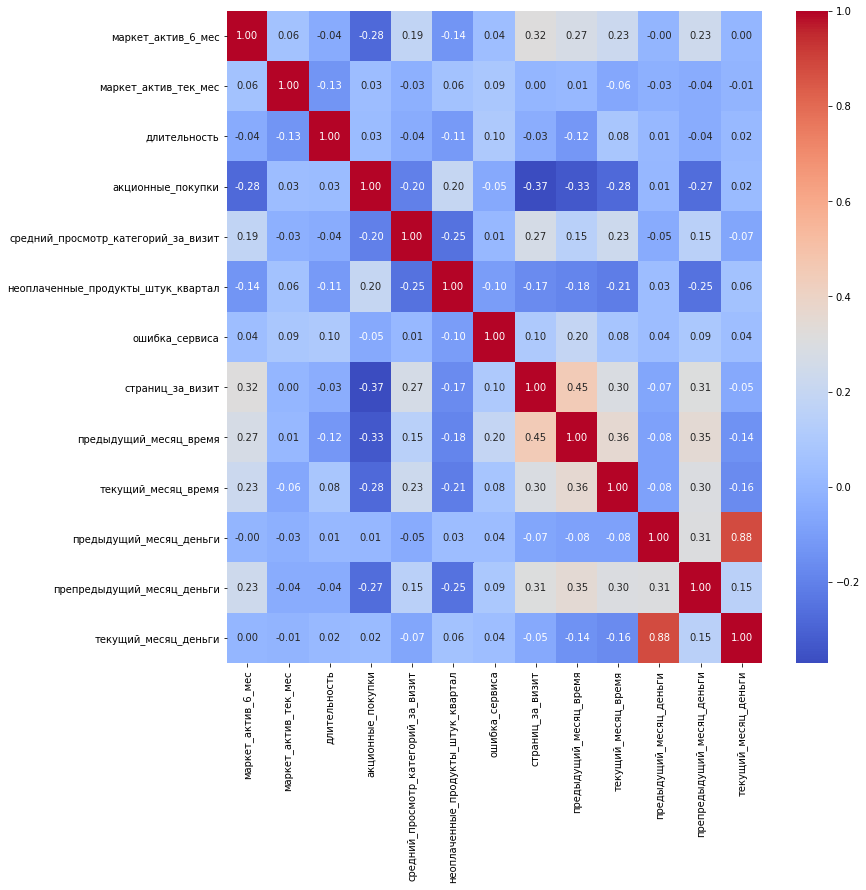

In [102]:
plt.figure(figsize=(12,12))

sns.heatmap(merged_data_cor.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

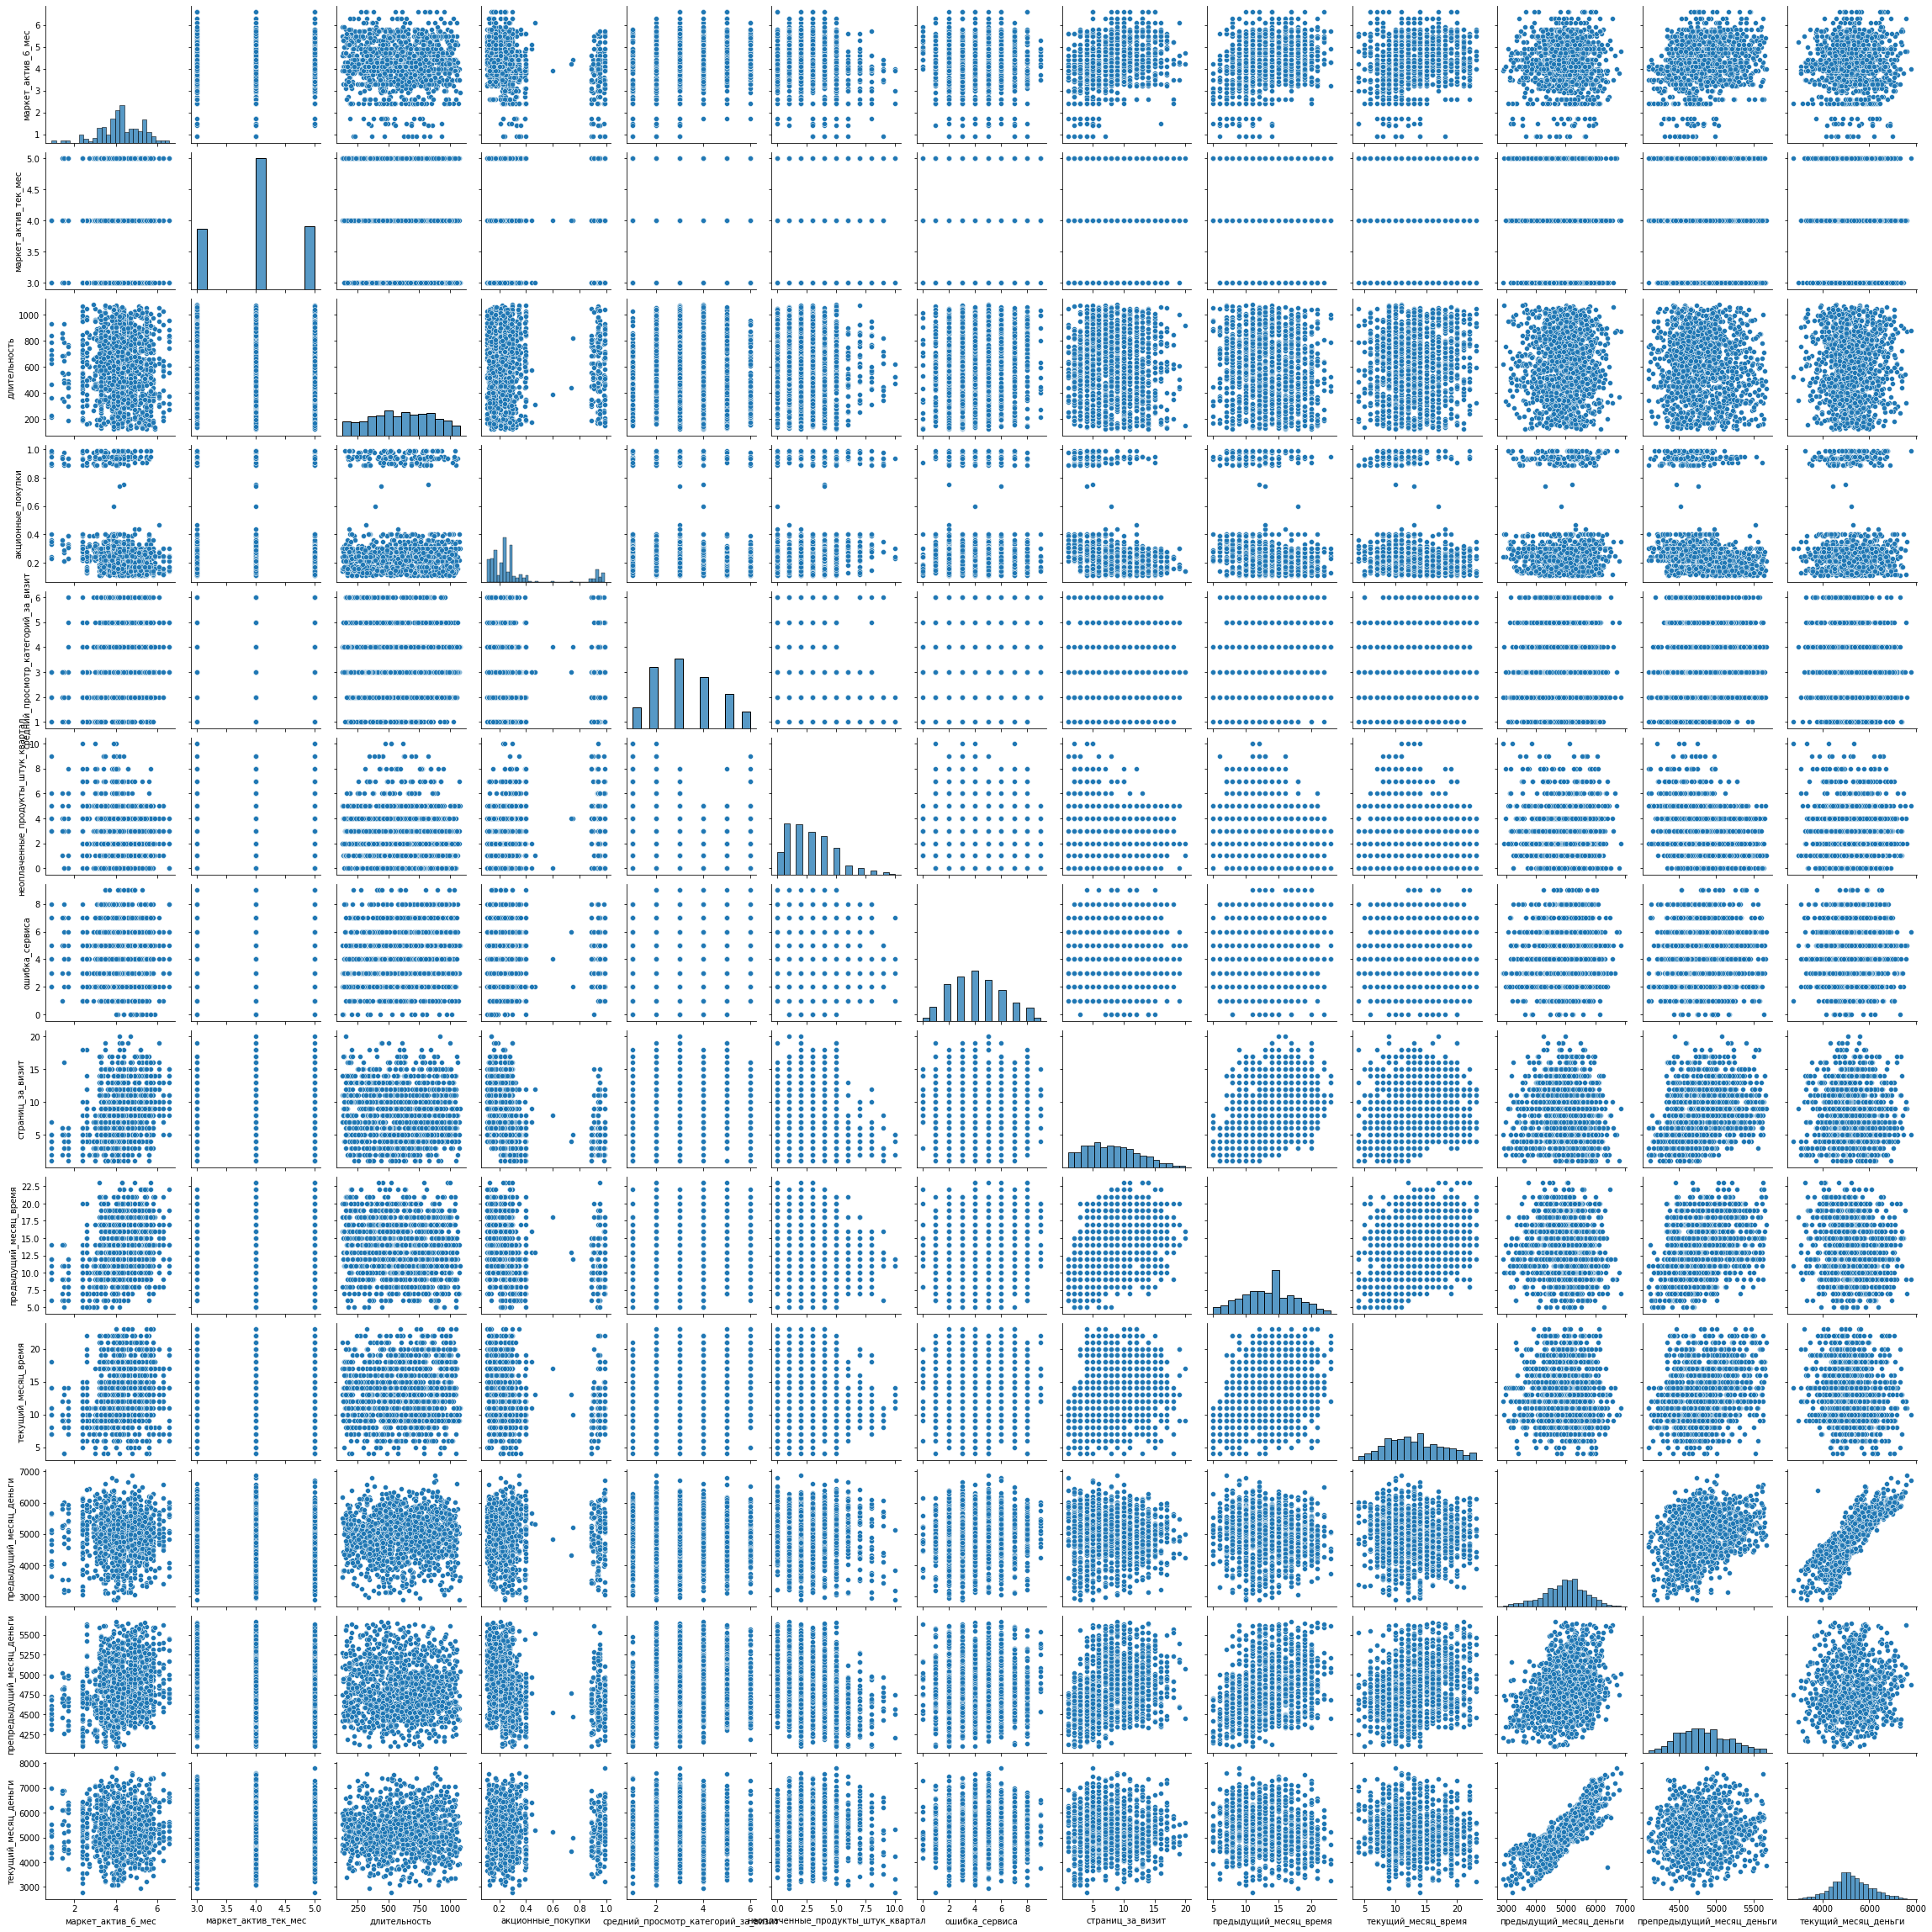

In [103]:
sns.pairplot(merged_data_cor)
plt.show()

**Вывод:**
На данном этапе была построена корреляционная матрица зависимостей между каждыми значениями

Исправил, снова воспользовался seaborn. Не понял, как делать проверку на мультиплинеарность 

Я вроде бы нашёл мультиколлинеарности, мне нужно избавиться от них и построить корреляцию по новым данным?

## Шаг 6. Использование пайплайнов

In [104]:
original_classes = ['Снизилась', 'Прежний уровень']

encoder = LabelEncoder()
encoder.classes = np.array(original_classes) 

X = merged_data_cor.drop(['покупательская_активность'], axis=1)
y = encoder.fit_transform(merged_data_cor['покупательская_активность'])

In [105]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [106]:
merged_data_cor['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [108]:
merged_data_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит              

In [109]:
ohe_columns = ['популярная_категория', 'разрешить_сообщать']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
               'акционные_покупки', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
               'страниц_за_визит','предыдущий_месяц_время','текущий_месяц_время',
               'предыдущий_месяц_деньги','препредыдущий_месяц_деньги',
               'текущий_месяц_деньги']

In [110]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [111]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [112]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [113]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [114]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5)
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5, 100)
    },

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1.0, 10.0, 100.0]
    },
    {
        'models': [SVC(probability=True)],
        'models__kernel': ['linear', 'rbf']
    }
]

In [115]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [116]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['популярная_категория',
                                                                                'разрешить_сообщать']),
                                                                              ('ord',
                                                                               Pipelin...
                   param_distributions=[{'models': [DecisionTreeClassifier(random_state=42)],
                                         'models__max_depth': range(2, 5),
                                         'models__max_features': range(2, 5)},
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(5, 100)},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': [0.1, 1.0, 10.0, 100.0]},
                                        {'models': [SVC(probability=True)],
                                         'models__kernel': ['linear', 'rbf']}],
                   random_state=42, scoring='roc_auc')

In [117]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred = randomized_search.predict_proba(X_test)[:, 1] 
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                 

**Вывод:** 
На этом этапе была разработана модель на основе пайплайнов. При обучении модели, получились такие значения:

    Модель: 
        KNeighborsClassifier с n_neighbors=92 оказалась лучшей.
    Качество:
        Тренировочная метрика: 0.8721
        ROC-AUC на тесте: 0.8864.


## Шаг 7. Анализ важности признаков

In [118]:
COUNT = 10

In [119]:
best_model = randomized_search.best_estimator_.named_steps['models']

In [120]:
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [121]:
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=ohe_columns)

In [122]:
ord_feature_names = ord_columns
num_feature_names = num_columns

In [123]:
all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

In [124]:
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

In [125]:
X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, COUNT, random_state=RANDOM_STATE)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, COUNT, random_state=RANDOM_STATE)

In [126]:
explainer = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
shap_values = explainer(X_test_preprocessed_smpl)

  0%|          | 0/10 [00:00<?, ?it/s]

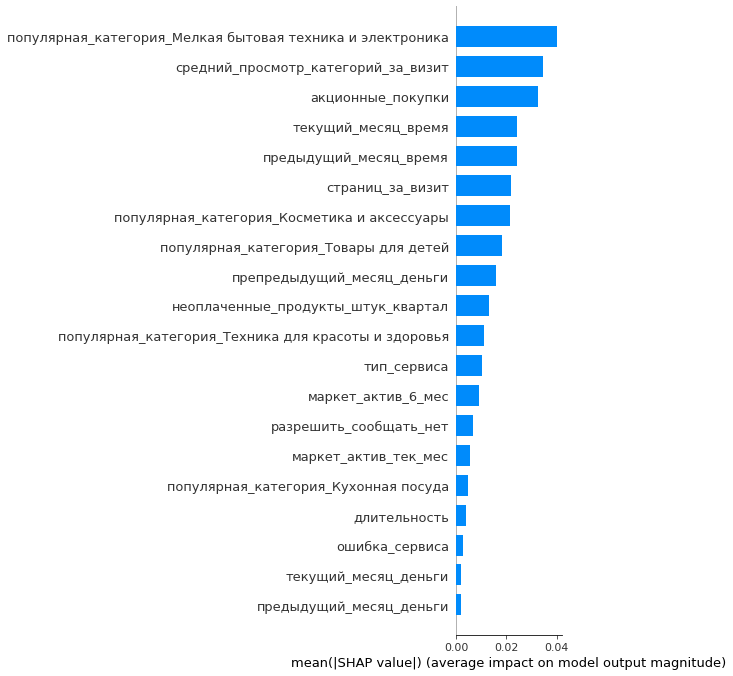

In [127]:
shap.summary_plot(shap_values[:, :, 1], X_test_preprocessed_smpl, plot_type="bar", max_display=30)

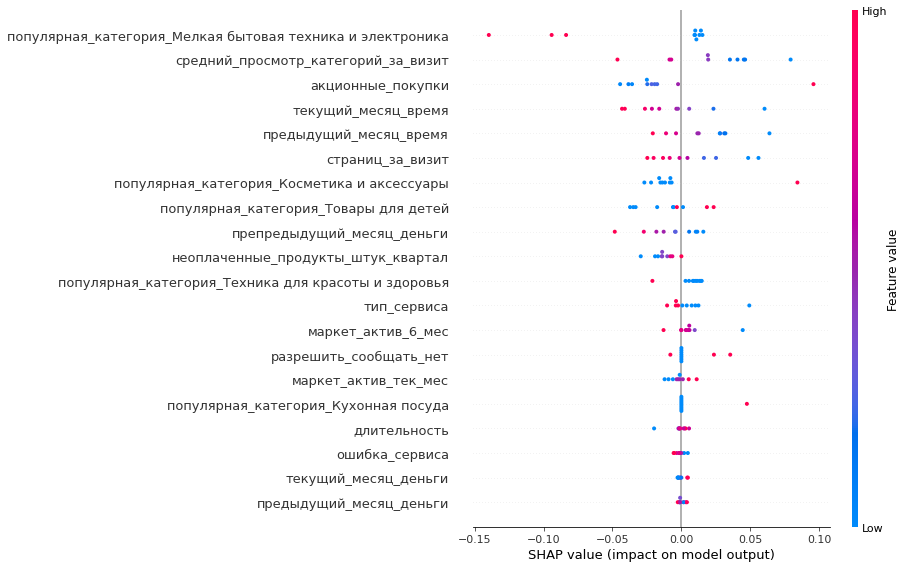

In [128]:
shap.plots.beeswarm(shap_values[:, :, 1], max_display=1000)

In [129]:
merged_data_cor['покупательская_активность'].head()

1    Снизилась
2    Снизилась
3    Снизилась
4    Снизилась
5    Снизилась
Name: покупательская_активность, dtype: object

In [130]:
merged_data_cor['покупательская_активность'].tail()

1295    Прежний уровень
1296    Прежний уровень
1297    Прежний уровень
1298    Прежний уровень
1299    Прежний уровень
Name: покупательская_активность, dtype: object

In [131]:
y

array([1, 1, 1, ..., 0, 0, 0])

Я проверил, по идее 1 - это снизилась, а 0 это прежний уровень

**Вывод:**
На первом графике показана средняя абсолютная величина значений SHAP для каждого признака. Это отражает их общий вклад в модель. Наиболее важные признаки:

- **популярная_категория_Мелкая бытовая техника и электроника** – имеет наибольший вклад, указывая на сильную связь с целевой переменной.
- **средний_просмотр_категорий_за_визит** – второй по значимости, влияет на предсказания модели.
- **акционные_покупки** – значимый фактор, вероятно, отражает акционный спрос.
- **текущий_месяц_время и предыдущий_месяц_время** – указывают на временные паттерны.
- **страниц_за_визит** – количество просмотренных страниц также важно.

Эти признаки определяют основную логику модели и требуют более детального анализа их направления и силы влияния.

На втором графике показано, как признаки взаимодействуют с таргетом. Ключевые наблюдения:

- **популярная_категория_Мелкая бытовая техника и электроника**:

    - Высокие значения (красные точки) имеют положительное влияние на целевую переменную (двигают предсказание вправо).
    - Низкие значения (синие точки) – отрицательное влияние (двигают влево).
    - Это может указывать на то, что покупатели этой категории чаще соответствуют положительному исходу (например, покупка/активность).
- **средний_просмотр_категорий_за_визит**:

    - Высокие значения увеличивают вероятность положительного исхода.
    - Низкие значения снижают вероятность.
- **акционные_покупки**:

    - Красные точки с высоким SHAP значением показывают, что участие в акциях сильно увеличивает вероятность положительного исхода.
- **временные признаки (текущий_месяц_время, предыдущий_месяц_время)**:

    - Значения с красным цветом (поздние временные отметки) могут иметь положительное влияние.
    - Это может указывать на временные паттерны, связанные с активностью.
- **страниц_за_визит**:

    - Больше страниц (красные точки) связано с ростом вероятности положительного исхода, что логично – больше просмотров часто означает больший интерес.

## Шаг 8. Сегментация покупателей

In [132]:
threshold = 0.55435

In [133]:
df_decline = result

In [134]:
best_model = randomized_search.best_estimator_
predictions = best_model.predict_proba(X)[:, 1]
df_decline ['вероятность_снижения']= predictions
prediction_flags = np.where(predictions > threshold, True, False)


/tmp/ipykernel_48/769948326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decline ['вероятность_снижения']= predictions


In [135]:
result

id покупательская_активность тип_сервиса разрешить_сообщать  \
1     215349                 Снизилась     премиум                 да   
2     215350                 Снизилась    стандарт                нет   
3     215351                 Снизилась    стандарт                 да   
4     215352                 Снизилась    стандарт                нет   
5     215353                 Снизилась    стандарт                 да   
...      ...                       ...         ...                ...   
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
1                    4.4                     4           819   
2                    4.9                     3           539   
3                    3.2                     5           896   
4                    5.1                     3          1064   
5                    3.3                     4           762   
...                  ...                   ...           ...   
1295                 6.6                     3           318   
1296                 5.1                     4           454   
1297                 4.1                     3           586   
1298                 6.3                     5           645   
1299                 4.0                     5           906   

      акционные_покупки            популярная_категория  \
1                  0.75                Товары для детей   
2                  0.14               Домашний текстиль   
3                  0.99                Товары для детей   
4                  0.94                Товары для детей   
5                  0.26               Домашний текстиль   
...                 ...                             ...   
1295               0.24  Техника для красоты и здоровья   
1296               0.21               Домашний текстиль   
1297               0.20               Домашний текстиль   
1298               0.12  Техника для красоты и здоровья   
1299               0.94  Техника для красоты и здоровья   

      средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
1                                       4                                   4   
2                                       5                                   2   
3                                       5                                   0   
4                                       3                                   2   
5                                       4                                   1   
...                                   ...                                 ...   
1295                                    5                                   3   
1296                                    6                                   2   
1297                                    3                                   2   
1298                                    3                                   3   
1299                                    4                                   5   

      ошибка_сервиса  страниц_за_визит  предыдущий_месяц_время  \
1                  2                 5                      12   
2                  1                 5                       8   
3                  6                 4                      11   
4                  3                 2                       8   
5                  1                 4                      10   
...              ...               ...                     ...   
1295               3                11                      14   
1296               3                 9                      12   
1297               5                 7                      12   
1298               5  

In [136]:
df_decline = result.loc[prediction_flags]

In [137]:
df_decline

id покупательская_активность тип_сервиса разрешить_сообщать  \
4    215352                 Снизилась    стандарт                нет   
16   215364                 Снизилась     премиум                 да   
25   215373                 Снизилась     премиум                нет   
27   215375                 Снизилась     премиум                 да   
28   215376                 Снизилась    стандарт                 да   
..      ...                       ...         ...                ...   
393  215741                 Снизилась    стандарт                 да   
395  215743                 Снизилась     премиум                 да   
396  215744                 Снизилась    стандарт                 да   
399  215747                 Снизилась    стандарт                 да   
584  215932                 Снизилась    стандарт                нет   

     маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
4                   5.1                     3          1064   
16                  4.3                     4           708   
25                  3.8                     3           811   
27                  3.0                     4           558   
28                  2.4                     3           534   
..                  ...                   ...           ...   
393                 4.8                     4           563   
395                 4.1                     4           375   
396                 1.7                     5           439   
399                 3.5                     5           452   
584                 5.3                     4           238   

     акционные_покупки    популярная_категория  \
4                 0.94        Товары для детей   
16                0.98       Домашний текстиль   
25                0.90        Товары для детей   
27                0.89        Товары для детей   
28                0.98       Домашний текстиль   
..                 ...                     ...   
393               0.94        Товары для детей   
395               0.32  Косметика и аксесcуары   
396               0.31         Кухонная посуда   
399               0.93        Товары для детей   
584               0.28        Товары для детей   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
4                                      3                                   2   
16                                     3                                   3   
25                                     2                                   5   
27                                     3                                   3   
28                                     4                                   1   
..                                   ...                                 ...   
393                                    1                                   5   
395                                    1                                   6   
396                                    1                                   5   
399                                    1                                   5   
584                                    1                                   5   

     ошибка_сервиса  страниц_за_визит  предыдущий_месяц_время  \
4                 3                 2                       8   
16                3                 3                      11   
25                5                 3                      10   
27                7                 4                       8   
28                5                 4                       8   
..              ...               ...                     ...   
393               7                 4                      10   
395               3                 3                      11   
396               2                 1                       6   
399               5                 4                      10   
584               2                 4                      11   

     текущий_месяц_время  предыдущий_месяц_д

In [138]:
df_decline = df_decline.merge(money, on='id', how='left')

In [139]:
df_decline

id покупательская_активность тип_сервиса разрешить_сообщать  \
0    215352                 Снизилась    стандарт                нет   
1    215364                 Снизилась     премиум                 да   
2    215373                 Снизилась     премиум                нет   
3    215375                 Снизилась     премиум                 да   
4    215376                 Снизилась    стандарт                 да   
..      ...                       ...         ...                ...   
179  215741                 Снизилась    стандарт                 да   
180  215743                 Снизилась     премиум                 да   
181  215744                 Снизилась    стандарт                 да   
182  215747                 Снизилась    стандарт                 да   
183  215932                 Снизилась    стандарт                нет   

     маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
0                   5.1                     3          1064   
1                   4.3                     4           708   
2                   3.8                     3           811   
3                   3.0                     4           558   
4                   2.4                     3           534   
..                  ...                   ...           ...   
179                 4.8                     4           563   
180                 4.1                     4           375   
181                 1.7                     5           439   
182                 3.5                     5           452   
183                 5.3                     4           238   

     акционные_покупки    популярная_категория  \
0                 0.94        Товары для детей   
1                 0.98       Домашний текстиль   
2                 0.90        Товары для детей   
3                 0.89        Товары для детей   
4                 0.98       Домашний текстиль   
..                 ...                     ...   
179               0.94        Товары для детей   
180               0.32  Косметика и аксесcуары   
181               0.31         Кухонная посуда   
182               0.93        Товары для детей   
183               0.28        Товары для детей   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
0                                      3                                   2   
1                                      3                                   3   
2                                      2                                   5   
3                                      3                                   3   
4                                      4                                   1   
..                                   ...                                 ...   
179                                    1                                   5   
180                                    1                                   6   
181                                    1                                   5   
182                                    1                                   5   
183                                    1                                   5   

     ошибка_сервиса  страниц_за_визит  предыдущий_месяц_время  \
0                 3                 2                       8   
1                 3                 3                      11   
2                 5                 3                      10   
3                 7                 4                       8   
4                 5                 4                       8   
..              ...               ...                     ...   
179               7                 4                      10   
180               3                 3                      11   
181               2                 1                       6   
182               5                 4                      10   
183               2                 4                      11   

     текущий_месяц_время  предыдущий_месяц_д

In [140]:
df_decline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   184 non-null    int64  
 1   покупательская_активность            184 non-null    object 
 2   тип_сервиса                          184 non-null    object 
 3   разрешить_сообщать                   184 non-null    object 
 4   маркет_актив_6_мес                   184 non-null    float64
 5   маркет_актив_тек_мес                 184 non-null    int64  
 6   длительность                         184 non-null    int64  
 7   акционные_покупки                    184 non-null    float64
 8   популярная_категория                 184 non-null    object 
 9   средний_просмотр_категорий_за_визит  184 non-null    int64  
 10  неоплаченные_продукты_штук_квартал   184 non-null    int64  
 11  ошибка_сервиса                  

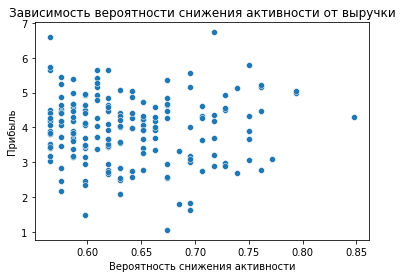

In [141]:
sns.scatterplot(data=df_decline, y='прибыль', x='вероятность_снижения')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

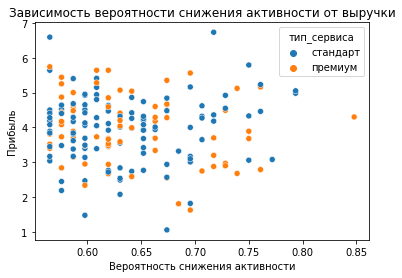

In [142]:
sns.scatterplot(data=df_decline, y='прибыль', x='вероятность_снижения', hue='тип_сервиса')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

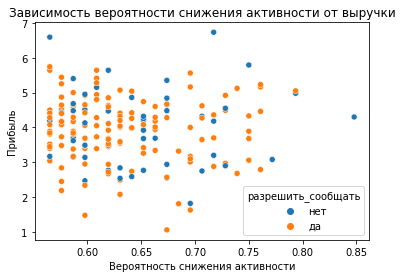

In [143]:
sns.scatterplot(data=df_decline, y='прибыль', x='вероятность_снижения', hue='разрешить_сообщать')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

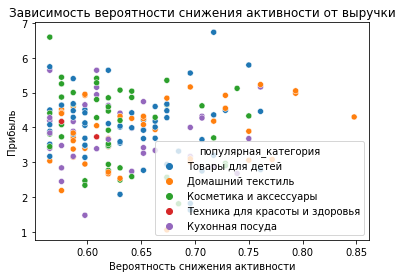

In [144]:
sns.scatterplot(data=df_decline, y='прибыль', x='вероятность_снижения', hue='популярная_категория')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесcуары',
       'Техника для красоты и здоровья', 'Кухонная посуда'], dtype=object)

Text(0.5, 0, 'Количество')

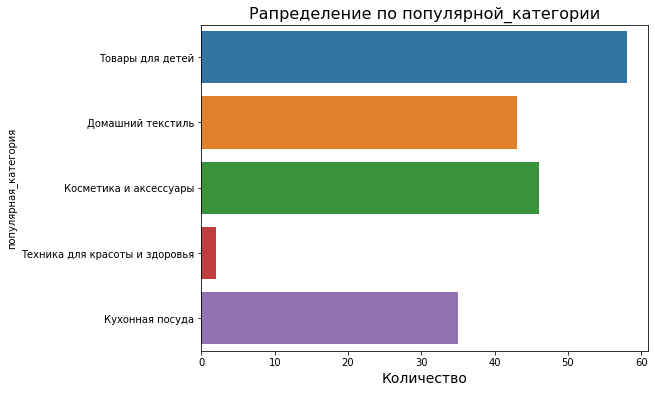

In [145]:
display(df_decline['популярная_категория'].unique()) 
plt.figure(figsize=(8,6))
plot = sns.countplot(y='популярная_категория', data=df_decline)
plot.set_title(f'Рапределение по популярной_категории', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)

array(['стандарт', 'премиум'], dtype=object)

Text(0.5, 0, 'Количество')

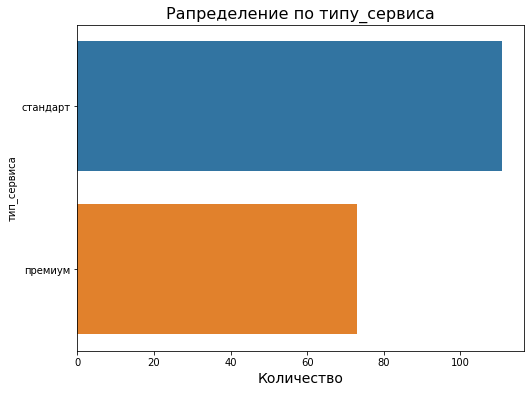

In [146]:
display(df_decline['тип_сервиса'].unique()) 
plt.figure(figsize=(8,6))
plot = sns.countplot(y='тип_сервиса', data=df_decline)
plot.set_title(f'Рапределение по типу_сервиса', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)

array(['нет', 'да'], dtype=object)

Text(0.5, 0, 'Количество')

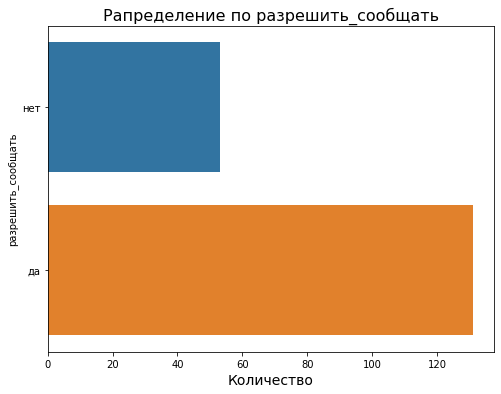

In [147]:
display(df_decline['разрешить_сообщать'].unique()) 
plt.figure(figsize=(8,6))
plot = sns.countplot(y='разрешить_сообщать', data=df_decline)
plot.set_title(f'Рапределение по разрешить_сообщать', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесcуары',
       'Техника для красоты и здоровья', 'Кухонная посуда'], dtype=object)

Text(0.5, 0, 'Количество')

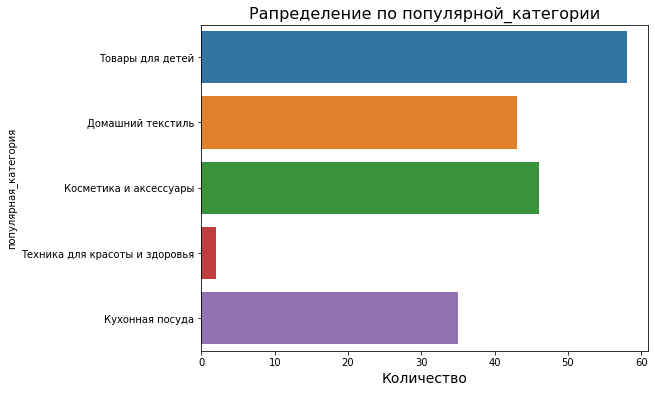

In [148]:
display(df_decline['популярная_категория'].unique()) 
plt.figure(figsize=(8,6))
plot = sns.countplot(y='популярная_категория', data=df_decline)
plot.set_title(f'Рапределение по популярной_категории', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)

Я немного модифицировал код, нарисовал другие графики и добавил столбец вероятности снижения
Но я не понимаю, как можно проанализировать данные графики

In [175]:
profit_threshold = df_decline['прибыль'].median()

In [188]:
df_decline['сегмент'] = df_decline\
.apply( lambda row: 'Исследуемый сегмент' \
        if row['вероятность_снижения'] > threshold and row['прибыль']>=profit_threshold \
        else 'Остальные пользователи' \
      , axis=1)

In [202]:
def histogram(df, col, target):
    plt.figure(figsize=(18,6))
    plot = sns.histplot(df, bins=20, kde=True, hue=target, x=col)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_ylabel('Количество', fontsize=14)

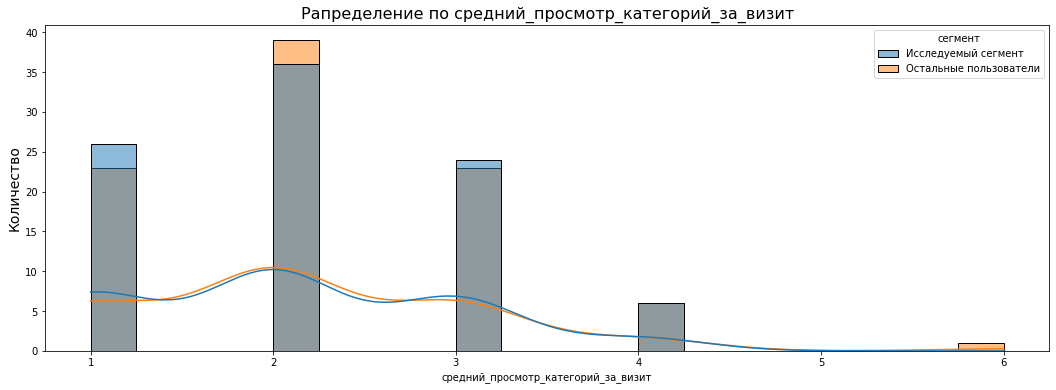

In [203]:
histogram(df_decline, 'средний_просмотр_категорий_за_визит', 'сегмент')

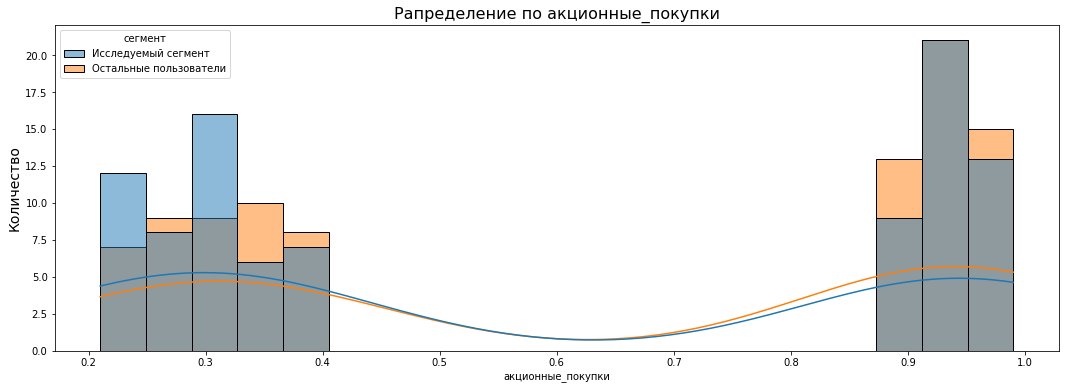

In [204]:
histogram(df_decline, 'акционные_покупки', 'сегмент')

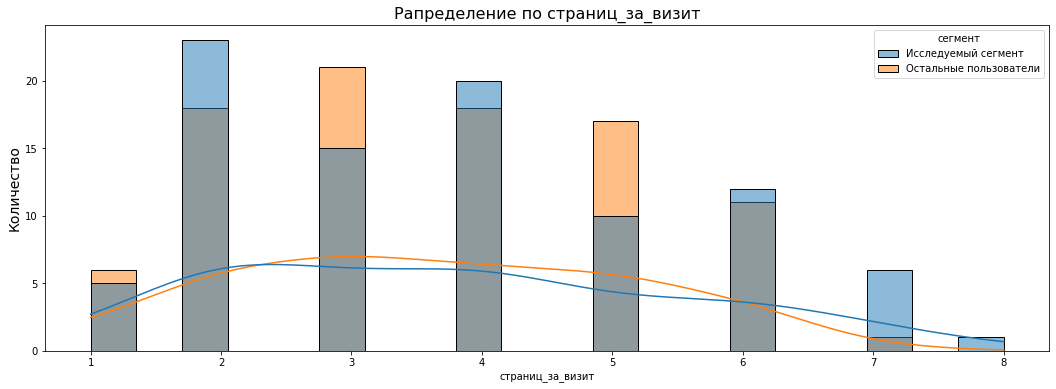

In [205]:
histogram(df_decline, 'страниц_за_визит', 'сегмент')

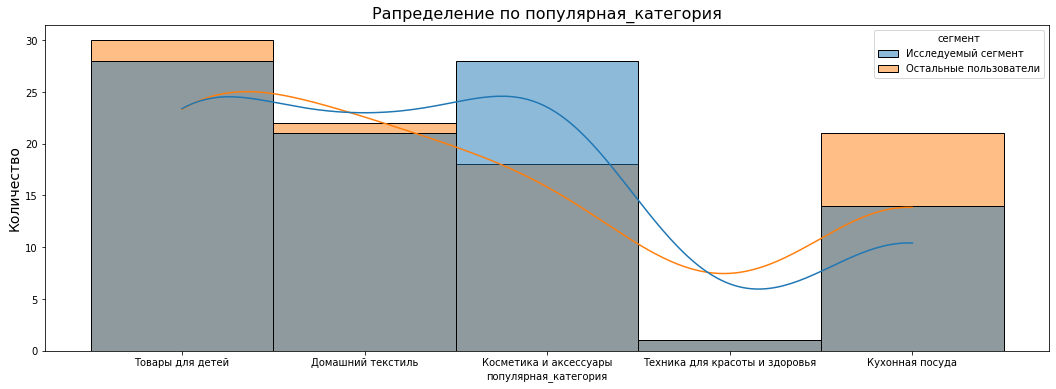

In [206]:
histogram(df_decline, 'популярная_категория', 'сегмент')

Я решил построить диаграммы на основе важных для модели признаков
Из наблюдений видно, что в изучаемый сегмент имеет пиковое значение среди категории "косметики и акасессуары"
Также люди которые активно снижают, но при этом прибыльные как минимум посещают сайт 2, 4, 6, 7, 8 раз
Ещё ползуются минимальными акциями
И ещё получается, что просматривают 1 или 3 категории за визит

# Чек-лист

~~# Шаг 1. Загрузка данных~~
 
 ~~**1.1 Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:**~~

~~/datasets/market_file.csv~~

~~/datasets/market_money.csv~~

~~/datasets/market_time.csv~~

~~/datasets/money.csv~~

~~Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.~~  

 ~~**1.2 Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.**~~

~~# Шаг 2. Предобработка данных~~

~~**Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.**~~

~~# Шаг 3. Исследовательский анализ данных~~

~~**Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.**~~

~~# Шаг 4. Объединение таблиц~~

~~**4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся.**~~

~~**4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.**~~

~~# Шаг 5. Корреляционный анализ~~

~~**Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.**~~

~~# Шаг 6. Использование пайплайнов~~

~~**Примените все изученные модели. Для этого используйте пайплайны.**~~

~~**6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.**~~

~~**Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.**~~

~~**6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.**~~

~~**6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:**~~

~~* использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;~~
~~* использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.~~

~~# Шаг 7. Анализ важности признаков~~

~~**7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP.** ~~

~~**7.2 Сделайте выводы о значимости признаков:**~~
~~какие признаки мало значимы для модели;~~
~~какие признаки сильнее всего влияют на целевой признак;~~
~~как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.~~

# Шаг 8. Сегментация покупателей

**8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.**

**8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность:** 
* Проведите графическое и аналитическое исследование группы покупателей.
* Сделайте предложения по работе с сегментом для увеличения покупательской активности.

**8.3 Сделайте выводы о сегментах:**
* какой сегмент вы взяли для дополнительного исследования,
* какие предложения вы сделали и почему.




- Исправить диаграмы с помощью seaborn
